In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
df = pd.read_excel("QVI_transaction_data.xlsx")

In [3]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [7]:
duplicate=df.duplicated()
df[duplicate].sum()

DATE                                               43374
STORE_NBR                                            107
LYLTY_CARD_NBR                                    107024
TXN_ID                                            108462
PROD_NBR                                              45
PROD_NAME         Smiths Thinly Cut   Roast Chicken 175g
PROD_QTY                                               2
TOT_SALES                                              6
dtype: object

In [8]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [9]:
df['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Infuzions BBQ Rib   Prawn Crackers 110g     3174
Tyrrells Crisps     

In [10]:

df['DATE']=pd.to_datetime(df['DATE'], unit='s')

df['DATE'].head()


0   1970-01-01 12:03:10
1   1970-01-01 12:06:39
2   1970-01-01 12:06:45
3   1970-01-01 12:02:09
4   1970-01-01 12:02:10
Name: DATE, dtype: datetime64[ns]

In [11]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1970-01-01 12:03:10,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1970-01-01 12:06:39,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1970-01-01 12:06:45,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,1970-01-01 12:02:09,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1970-01-01 12:02:10,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [12]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [13]:
df.corr()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,1.000000,0.950869,0.997593,0.002309,0.005295,0.003234
LYLTY_CARD_NBR,0.950869,1.000000,0.954919,0.001755,0.003834,0.002908
TXN_ID,0.997593,0.954919,1.000000,0.002544,0.005343,0.003468
PROD_NBR,0.002309,0.001755,0.002544,1.000000,-0.004813,-0.133851
PROD_QTY,0.005295,0.003834,0.005343,-0.004813,1.000000,0.715307
TOT_SALES,0.003234,0.002908,0.003468,-0.133851,0.715307,1.000000


In [14]:
df_pur= pd.read_excel("QVI_purchase_behaviour.xlsx")

In [15]:
df_pur.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## 1.LYLTY_CARD_NBR and TXN_ID are very highly correlated with STORE_NBR

## 2.Delete  TXN_ID and STORE_NBR as they are very positively correlated with  LYLTY_CARD_NBR .Since  They will cause problem of multiColinearity but there is no need here sinces we will not be building a ML mo


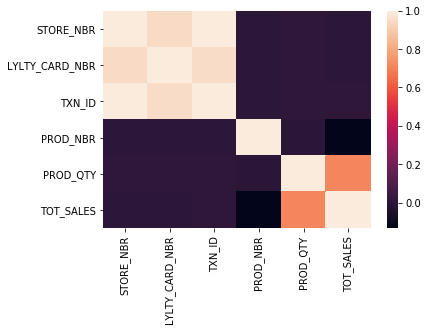

In [16]:
sns.heatmap(df.corr())

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


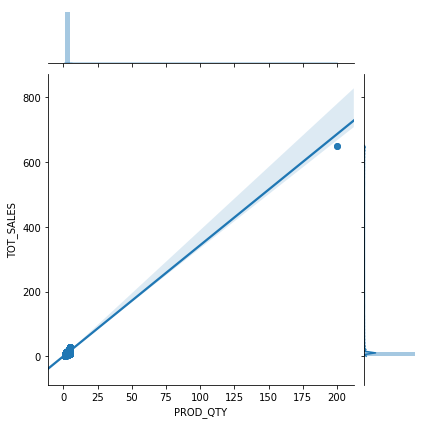

In [17]:
sns.jointplot(x='PROD_QTY' , y='TOT_SALES',data=df,kind='reg')

## This is the outlier here 

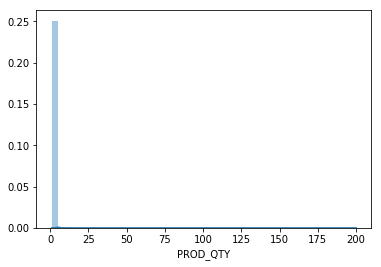

In [18]:
sns.distplot(df['PROD_QTY'])#kde is by default on

## --------------------------------------------------------------------------------------------------------------------------------------------------

## Performing Capping for outlier is an other way to treat outlier but here just try to discard the value.

# Capping can be done in following way.However it is not recommended here.

In [19]:
np.percentile(df.PROD_QTY,[99])

array([2.])

In [20]:
np.percentile(df.PROD_QTY,[99])[0]

2.0

In [21]:
uv=np.percentile(df.PROD_QTY,[99])[0]

In [22]:
df[(df.PROD_QTY>uv)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1,1970-01-01 12:06:39,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
3,1970-01-01 12:02:09,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1970-01-01 12:02:10,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
11,1970-01-01 12:02:12,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0
16,1970-01-01 12:02:10,20,20418,17413,94,Burger Rings 220g,4,9.2
31,1970-01-01 12:06:40,43,43227,40186,26,Pringles Sweet&Spcy BBQ 134g,4,14.8
56,1970-01-01 12:06:41,74,74336,73182,84,GrnWves Plus Btroot & Chilli Jam 180g,5,15.5
72,1970-01-01 12:02:11,96,96203,96025,7,Smiths Crinkle Original 330g,5,28.5
74,1970-01-01 12:02:08,97,97159,97271,35,Woolworths Mild Salsa 300g,5,7.5
100,1970-01-01 12:06:45,130,130108,134125,2,Cobs Popd Sour Crm &Chives Chips 110g,5,19.0


In [23]:
df.PROD_QTY[(df.PROD_QTY>5*uv)]=5*uv

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.905874,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.344154,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,10.000000,650.000000


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


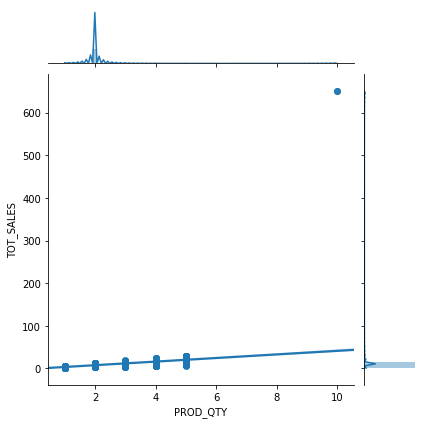

In [25]:
sns.jointplot(x='PROD_QTY' , y='TOT_SALES',data=df,kind='reg')

In [26]:
np.percentile(df.TOT_SALES,[99])

array([13.])

In [27]:
np.percentile(df.TOT_SALES,[99])[0]

13.0

In [28]:
uv2=np.percentile(df.TOT_SALES,[99])[0]

In [29]:
df[(df.TOT_SALES>uv2)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
3,1970-01-01 12:02:09,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1970-01-01 12:02:10,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
11,1970-01-01 12:02:12,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0
31,1970-01-01 12:06:40,43,43227,40186,26,Pringles Sweet&Spcy BBQ 134g,4,14.8
56,1970-01-01 12:06:41,74,74336,73182,84,GrnWves Plus Btroot & Chilli Jam 180g,5,15.5
72,1970-01-01 12:02:11,96,96203,96025,7,Smiths Crinkle Original 330g,5,28.5
100,1970-01-01 12:06:45,130,130108,134125,2,Cobs Popd Sour Crm &Chives Chips 110g,5,19.0
102,1970-01-01 12:06:40,133,133250,137666,30,Doritos Corn Chips Cheese Supreme 170g,4,17.6
109,1970-01-01 12:06:45,153,153106,152359,30,Doritos Corn Chips Cheese Supreme 170g,3,13.2
124,1970-01-01 12:06:42,168,168219,170719,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,4,15.2


In [30]:
df.TOT_SALES[(df.TOT_SALES>1.1*uv2)]=1.1*uv2

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.905874,7.287521
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.344154,2.475296
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,10.000000,14.300000


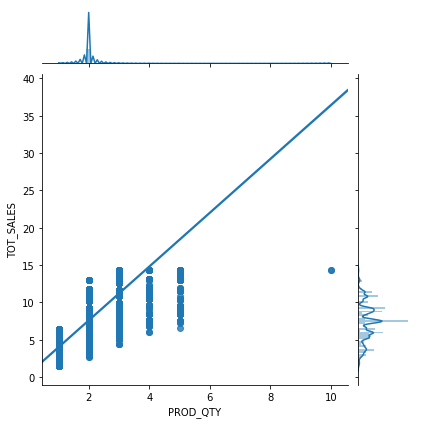

In [32]:
sns.jointplot(x='PROD_QTY' , y='TOT_SALES',data=df,kind='reg')

# However Capping doesnt gives satisfactory result. We will discard the corresponding value causing the outlier 

## --------------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
df = pd.read_excel("QVI_transaction_data.xlsx")

In [20]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [21]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [22]:
df[df['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


# Delete the above  values 

In [23]:
df.drop(df[df['LYLTY_CARD_NBR'] == 226000].index, inplace = True)


In [24]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,43464.036230,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,105.389007,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


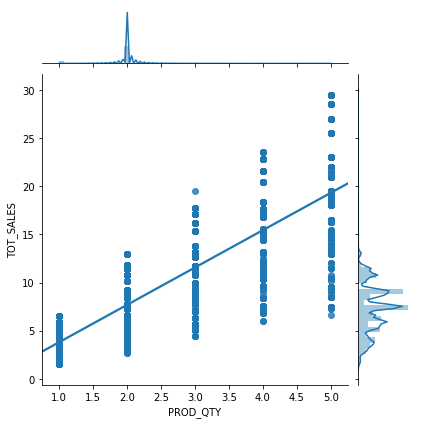

In [25]:
sns.jointplot(x='PROD_QTY' , y='TOT_SALES',data=df,kind='reg')

# Done with Outlier

In [26]:
df_pur= pd.read_excel("QVI_purchase_behaviour.xlsx")

In [27]:
df_pur.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [28]:
df_pur.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [29]:
df_pur['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

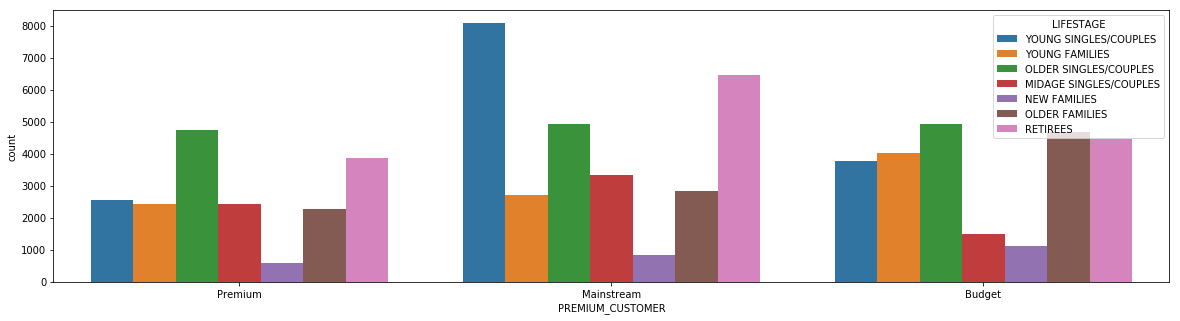

In [30]:
plt.figure(figsize=(20,5))

sns.countplot(x='PREMIUM_CUSTOMER',data=df_pur,hue='LIFESTAGE')

In [31]:
df_pur['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

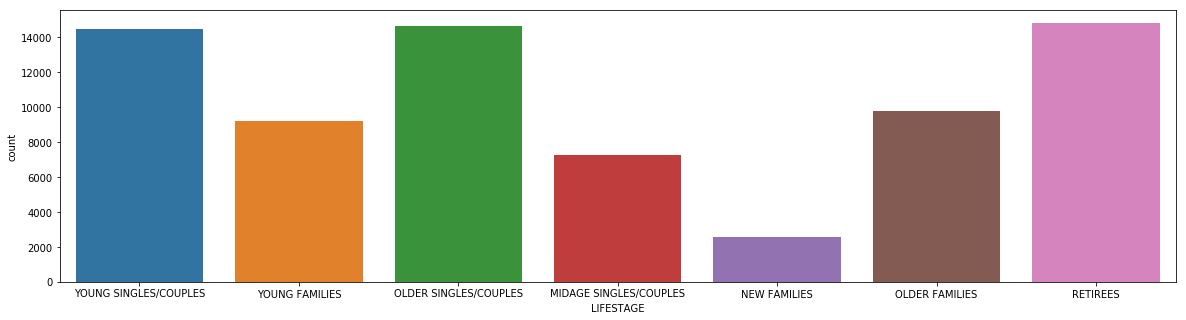

In [32]:
plt.figure(figsize=(20,5))
sns.countplot(x='LIFESTAGE',data=df_pur)

## Merging the tables

In [33]:
df_merge=pd.merge(df,df_pur,how='left',on='LYLTY_CARD_NBR')

In [34]:
df_merge.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [35]:
df_merge.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

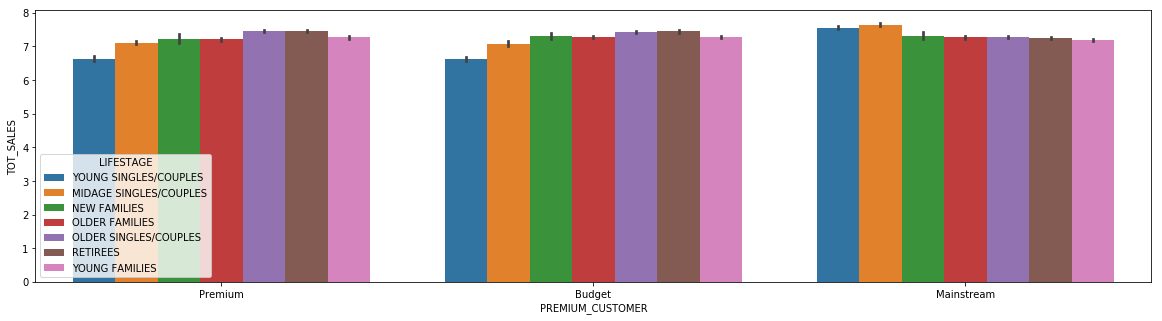

In [36]:
plt.figure(figsize=(20,5))
sns.barplot(x='PREMIUM_CUSTOMER',y='TOT_SALES',data=df_merge,hue='LIFESTAGE')

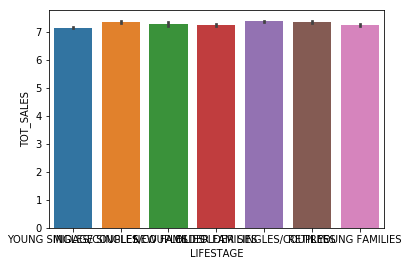

In [37]:
sns.barplot(x='LIFESTAGE',y='TOT_SALES',data=df_merge)

In [41]:
df_merge[['PACK_BRAND', 'PACK_info']] = df_merge["PROD_NAME"].str.split(n=1,expand=True)



In [43]:
df_merge.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_BRAND,PACK_info
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,Chip Compny SeaSalt175g
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,Nacho Cheese 175g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,Crinkle Cut Chips Chicken 170g
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,Chip Thinly S/Cream&Onion 175g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,Tortilla ChpsHny&Jlpno Chili 150g


In [45]:
df_merge['PACK_SIZE'] = df_merge['PACK_info'].str.split().str[-1]


In [46]:
df_merge.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_BRAND,PACK_info,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,Chip Compny SeaSalt175g,SeaSalt175g
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,Nacho Cheese 175g,175g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,Crinkle Cut Chips Chicken 170g,170g
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,Chip Thinly S/Cream&Onion 175g,175g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,Tortilla ChpsHny&Jlpno Chili 150g,150g


In [52]:
df_merge['PACK_SIZE'].value_counts()

175g                  60561
150g                  41633
134g                  25102
110g                  22387
170g                  18502
165g                  15297
330g                  12540
300g                  12041
380g                   6416
200g                   4473
Salt                   3257
Chicken270g            3170
250g                   3169
210g                   3167
Ht300g                 3125
270g                   3115
210G                   3105
90g                    3008
190g                   2995
160g                   2970
220g                   1564
70g                    1507
150G                   1498
Chs&Onion170g          1481
180g                   1468
SeaSalt175g            1468
Chli&S/Cream175G       1461
Chckn175g              1460
125g                   1454
CutSalt/Vinegr175g     1440
Name: PACK_SIZE, dtype: int64

In [53]:
df_merge['PACK_SIZE'] = df_merge['PACK_SIZE'].replace('Chicken270g','270g').replace('Chs&Onion170g','170g').replace('SeaSalt175g','175g').replace('Chli&S/Cream175G','175g').replace('Ht300g','300g').replace('210G','210g').replace('Chckn175g','175g').replace('CutSalt/Vinegr175g','175g')


In [54]:
df_merge.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_BRAND,PACK_info,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,Chip Compny SeaSalt175g,175g
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,Nacho Cheese 175g,175g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,Crinkle Cut Chips Chicken 170g,170g
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,Chip Thinly S/Cream&Onion 175g,175g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,Tortilla ChpsHny&Jlpno Chili 150g,150g


In [56]:
df_merge['PACK_BRAND'].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: PACK_BRAND, dtype: int64

In [58]:
df_merge['PACK_SIZE'].value_counts()

175g    66390
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6416
270g     6285
210g     6272
200g     4473
Salt     3257
250g     3169
90g      3008
190g     2995
160g     2970
220g     1564
70g      1507
150G     1498
180g     1468
125g     1454
Name: PACK_SIZE, dtype: int64

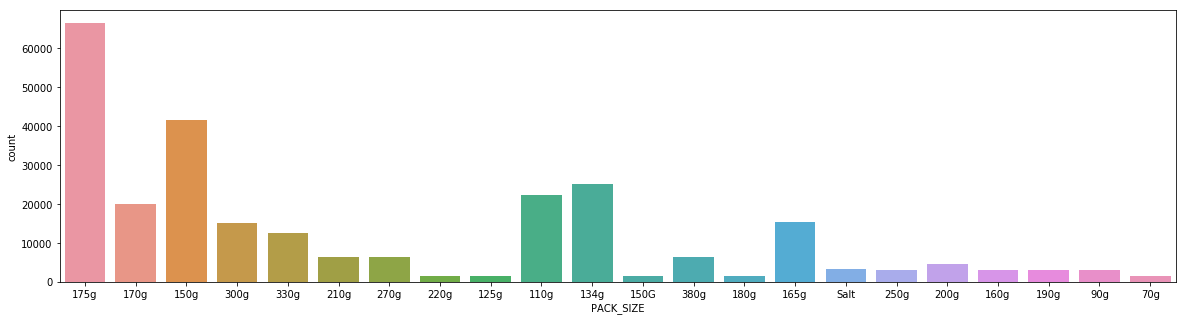

In [66]:
plt.figure(figsize=(20,5))
sns.countplot(x='PACK_SIZE',data=df_merge)

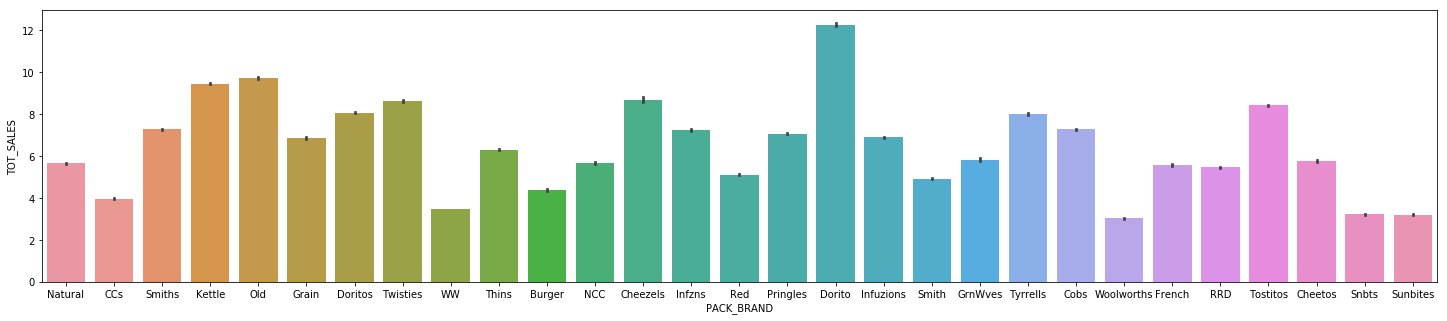

In [70]:
plt.figure(figsize=(25,5))

sns.barplot(x='PACK_BRAND',y='TOT_SALES',data=df_merge)

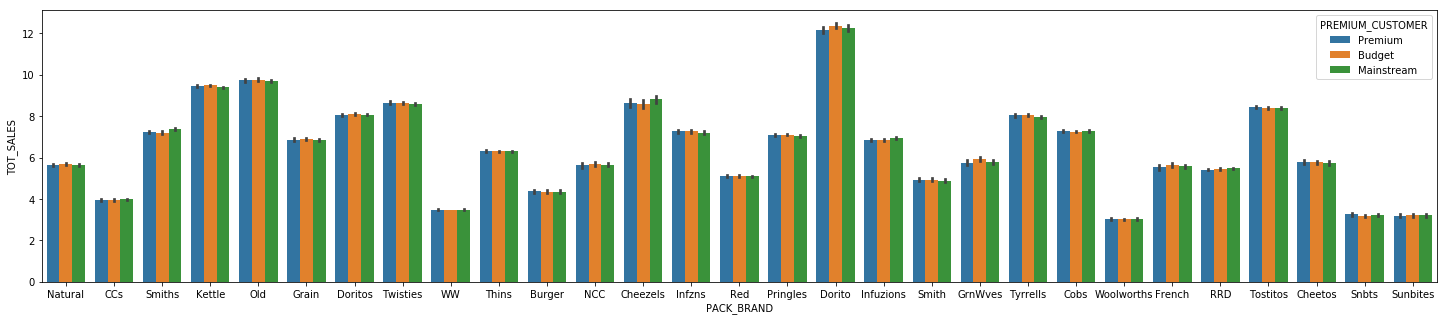

In [71]:
plt.figure(figsize=(25,5))

sns.barplot(x='PACK_BRAND',y='TOT_SALES',data=df_merge,hue='PREMIUM_CUSTOMER')